In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filePath = '../data/Glioblastoma/gbm_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem.txt'

In [3]:
df = pd.read_csv(filePath, sep = '\t')
df.head()

,Hugo_Symbol,Entrez_Gene_Id,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-06-0125-01,TCGA-06-0125-02,TCGA-06-0129-01,...,TCGA-41-3915-01,TCGA-41-4097-01,TCGA-41-5651-01,TCGA-76-4925-01,TCGA-76-4926-01,TCGA-76-4927-01,TCGA-76-4928-01,TCGA-76-4929-01,TCGA-76-4931-01,TCGA-76-4932-01
0,NaN,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.4604,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,NaN,100133144,3.0732,0.0000,2.9467,15.9952,5.5610,9.9246,3.3758,22.3207,...,8.2279,15.2648,1.2190,12.2160,9.5716,2.4096,10.1709,8.4757,6.1600,0.0000
2,UBE2Q2P2,100134869,6.7611,15.6973,13.9398,14.9571,4.8049,11.6684,3.3862,16.8239,...,10.2174,13.8987,10.3611,17.3596,13.9689,6.4257,6.4812,3.2496,7.9576,9.9502
3,HMGB1P1,10357,54.7036,31.3945,60.3441,91.8238,62.5366,52.1491,41.6125,76.2289,...,35.5731,27.6285,70.0838,108.1350,70.5556,43.0201,42.4584,62.2278,58.8188,60.1990
4,NaN,10431,886.3210,885.7740,1234.8300,470.0000,546.3410,391.9330,419.2460,642.3830,...,512.5160,593.2460,507.6950,531.9330,588.0410,620.8840,533.7420,668.9000,458.3530,499.5020


In [4]:
df.set_index('Entrez_Gene_Id', inplace=True)
df.drop('Hugo_Symbol', axis=1, inplace=True)
df.columns.name = 'Sample ID'
df.head()

Sample ID,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-06-0125-01,TCGA-06-0125-02,TCGA-06-0129-01,TCGA-06-0130-01,TCGA-06-0132-01,...,TCGA-41-3915-01,TCGA-41-4097-01,TCGA-41-5651-01,TCGA-76-4925-01,TCGA-76-4926-01,TCGA-76-4927-01,TCGA-76-4928-01,TCGA-76-4929-01,TCGA-76-4931-01,TCGA-76-4932-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.4604,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
100133144,3.0732,0.0000,2.9467,15.9952,5.5610,9.9246,3.3758,22.3207,0.6395,2.0205,...,8.2279,15.2648,1.2190,12.2160,9.5716,2.4096,10.1709,8.4757,6.1600,0.0000
100134869,6.7611,15.6973,13.9398,14.9571,4.8049,11.6684,3.3862,16.8239,2.9706,3.4077,...,10.2174,13.8987,10.3611,17.3596,13.9689,6.4257,6.4812,3.2496,7.9576,9.9502
10357,54.7036,31.3945,60.3441,91.8238,62.5366,52.1491,41.6125,76.2289,35.0696,39.0893,...,35.5731,27.6285,70.0838,108.1350,70.5556,43.0201,42.4584,62.2278,58.8188,60.1990
10431,886.3210,885.7740,1234.8300,470.0000,546.3410,391.9330,419.2460,642.3830,774.1100,709.8910,...,512.5160,593.2460,507.6950,531.9330,588.0410,620.8840,533.7420,668.9000,458.3530,499.5020


In [5]:
df = df.transpose()
nRows, nCols = df.shape
print('Rows:', nRows, 'Columns:', nCols)
mem = df.memory_usage(deep=True).sum() / (1024**2)
print(f'Memory MB: {mem:.2f}')
display(df.head())

Rows: 160 Columns: 20531
Memory MB: 25.08


Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0047-01,0.0,3.0732,6.7611,54.7036,886.321,0.0,232.951,0.0000,0.0,0.0,...,260.211,404.4380,65.1526,356.495,1108.820,0.6146,1207.170,3867.97,1397.090,603.583
TCGA-02-0055-01,0.0,0.0000,15.6973,31.3945,885.774,0.0,162.018,0.5606,0.0,0.0,...,467.560,245.5500,42.6069,280.308,607.708,5.0456,924.457,11481.40,606.027,718.150
TCGA-02-2483-01,0.0,2.9467,13.9398,60.3441,1234.830,0.0,135.092,0.0000,0.0,0.0,...,682.242,669.1290,19.4195,406.121,866.280,44.3272,1208.650,5066.81,832.084,705.435
TCGA-02-2485-01,0.0,15.9952,14.9571,91.8238,470.000,0.0,417.619,1.9048,0.0,0.0,...,440.386,441.9050,53.8095,274.286,1345.710,0.0000,1070.000,5090.95,1139.520,700.476
TCGA-02-2486-01,0.0,5.5610,4.8049,62.5366,546.341,0.0,276.219,0.0000,0.0,0.0,...,166.689,74.3902,31.7073,198.171,652.439,0.0000,689.634,7800.00,627.439,527.439


In [6]:
sampleSize = 25
randomColumnSample = np.random.choice(nCols, sampleSize, replace=False)

subDf = df.iloc[:,randomColumnSample]

subDf.describe()

Entrez_Gene_Id,9495,114971,51069,29903,337867,80000,647288,79443,51300,144165,...,117195,84966,286380,1466,27067,3428,390598,343263,574040,3710
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,90.877166,1176.948163,583.697356,743.890656,1358.132638,10.105404,0.448816,485.730119,1426.326562,335.016574,...,1.222106,511.096212,1.015788,2719.929119,850.836031,2858.506106,14.483226,15.064403,1.212275,248.080796
std,71.696250,453.273293,177.923236,243.952713,373.344440,20.512790,0.708332,219.602872,514.814720,319.716354,...,3.009532,470.430293,1.228281,2066.590013,207.947932,1773.441679,10.639140,28.448916,6.073310,248.468541
min,10.955400,310.799000,248.968000,234.733000,668.376000,0.000000,0.000000,106.491000,366.254000,27.578700,...,0.000000,3.194900,0.000000,337.845000,414.131000,135.457000,0.825300,0.000000,0.000000,0.000000
25%,45.497025,891.044500,465.560750,569.378750,1114.095000,0.566925,0.000000,344.708000,1122.595000,125.143500,...,0.000000,187.015000,0.000000,1349.937500,705.520000,1780.627500,7.332400,5.064000,0.000000,93.721150
50%,77.349450,1090.645000,562.309500,710.535500,1311.585000,2.584750,0.000000,452.083000,1300.420000,250.745500,...,0.000000,366.455000,0.572250,2188.065000,818.563500,2548.630000,12.237750,9.192950,0.000000,164.972500
75%,105.081000,1360.525000,658.793000,883.273000,1545.850000,7.783125,0.671375,615.683750,1602.912500,416.608000,...,1.083025,620.680750,1.509450,3607.297500,973.514250,3610.975000,18.812600,16.626750,0.613425,304.425750
max,533.835000,3487.780000,1262.630000,1555.270000,2921.050000,122.444000,6.651900,1359.910000,4370.600000,2289.920000,...,23.233300,2650.320000,9.033800,14876.500000,1505.440000,13967.500000,66.443300,301.870000,67.623000,1308.780000


In [7]:
subDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, TCGA-02-0047-01 to TCGA-76-4932-01
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   9495    160 non-null    float64
 1   114971  160 non-null    float64
 2   51069   160 non-null    float64
 3   29903   160 non-null    float64
 4   337867  160 non-null    float64
 5   80000   160 non-null    float64
 6   647288  160 non-null    float64
 7   79443   160 non-null    float64
 8   51300   160 non-null    float64
 9   144165  160 non-null    float64
 10  10652   160 non-null    float64
 11  493860  160 non-null    float64
 12  6633    160 non-null    float64
 13  25822   160 non-null    float64
 14  94158   160 non-null    float64
 15  117195  160 non-null    float64
 16  84966   160 non-null    float64
 17  286380  160 non-null    float64
 18  1466    160 non-null    float64
 19  27067   160 non-null    float64
 20  3428    160 non-null    float64
 21  390598  160 non-nu

No numbers appear to be missing...

In [8]:
constantCols = df.columns[df.var(axis=0) < 1e-10]
numConstantCols = len(constantCols)
print(f'There are {numConstantCols} columns (out of {nCols} total, so {round(numConstantCols/nCols*100, 2)}%) that have constant value; they will be dropped.')

There are 535 columns (out of 20531 total, so 2.61%) that have constant value; they will be dropped.


In [9]:
df = df.drop(columns = constantCols)
nCols = df.shape[1]
print(f'There are {nCols} columns left')

There are 19996 columns left


In [10]:
variances = df.var(axis=0)
nTopGenes = 100
mostVariantGenes=variances.nlargest(nTopGenes).index
print(f'The most "informative" genes were {mostVariantGenes[:5]}')

The most "informative" genes were Index([2670, 1191, 1116, 6696, 7846], dtype='int64', name='Entrez_Gene_Id')


In [11]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_scaled = pd.DataFrame(std_scaler.fit_transform(df), index=df.index, columns=df.columns)

subDf_scaled = df_scaled.loc[:,mostVariantGenes]

subDf_scaled.describe()

Entrez_Gene_Id,2670,1191,1116,6696,7846,1019,2335,1281,1278,2512,...,84525,3486,6188,9168,4637,7314,6171,5764,2697,4502
count,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,...,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02
mean,0.000000,-2.359224e-16,-1.665335e-16,7.105427e-16,-5.551115e-17,1.776357e-16,2.275957e-16,-1.387779e-17,7.216450e-17,-7.771561e-17,...,2.914335e-16,9.992007e-17,-1.026956e-15,1.959544e-15,2.831069e-16,1.598721e-15,6.133982e-16,3.663736e-16,2.886580e-16,-5.079270e-16
std,1.003140,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,...,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.401810,-1.399700e+00,-6.826622e-01,-9.770159e-01,-1.182949e+00,-3.456722e-01,-6.279145e-01,-2.836183e-01,-3.188249e-01,-1.191922e+00,...,-5.839473e-01,-6.583333e-01,-9.941942e-01,-1.348888e+00,-1.402419e+00,-2.197137e+00,-1.469881e+00,-1.385707e+00,-1.017358e+00,-9.639112e-01
25%,-0.746931,-6.416707e-01,-6.040780e-01,-6.594635e-01,-5.225622e-01,-3.189126e-01,-4.170687e-01,-2.493471e-01,-2.755419e-01,-7.210941e-01,...,-4.849824e-01,-4.756881e-01,-5.476211e-01,-6.686700e-01,-5.285412e-01,-6.198886e-01,-6.586782e-01,-7.436126e-01,-6.192689e-01,-5.887679e-01
50%,-0.212910,-2.397230e-01,-3.944996e-01,-3.720575e-01,-2.094583e-01,-3.021439e-01,-2.007400e-01,-2.194980e-01,-2.352405e-01,-2.653529e-01,...,-3.117413e-01,-2.987503e-01,-2.728578e-01,-2.391904e-01,-2.156382e-01,-1.201313e-01,-2.593100e-01,-1.916081e-01,-2.693057e-01,-3.046694e-01
75%,0.471965,4.160601e-01,9.144616e-02,3.025555e-01,1.955691e-01,-2.594057e-01,8.151121e-02,-1.277523e-01,-1.253612e-01,3.318599e-01,...,5.540566e-02,1.483004e-01,1.702712e-01,4.425169e-01,2.157883e-01,3.338679e-01,2.866687e-01,3.977572e-01,2.257034e-01,1.998277e-01
max,3.333220,5.295378e+00,6.260559e+00,5.202274e+00,6.881874e+00,8.910029e+00,8.694074e+00,1.035425e+01,8.008396e+00,4.227107e+00,...,8.008628e+00,8.735285e+00,8.967950e+00,4.793570e+00,4.962053e+00,4.233597e+00,4.174823e+00,4.141672e+00,6.775157e+00,5.274701e+00


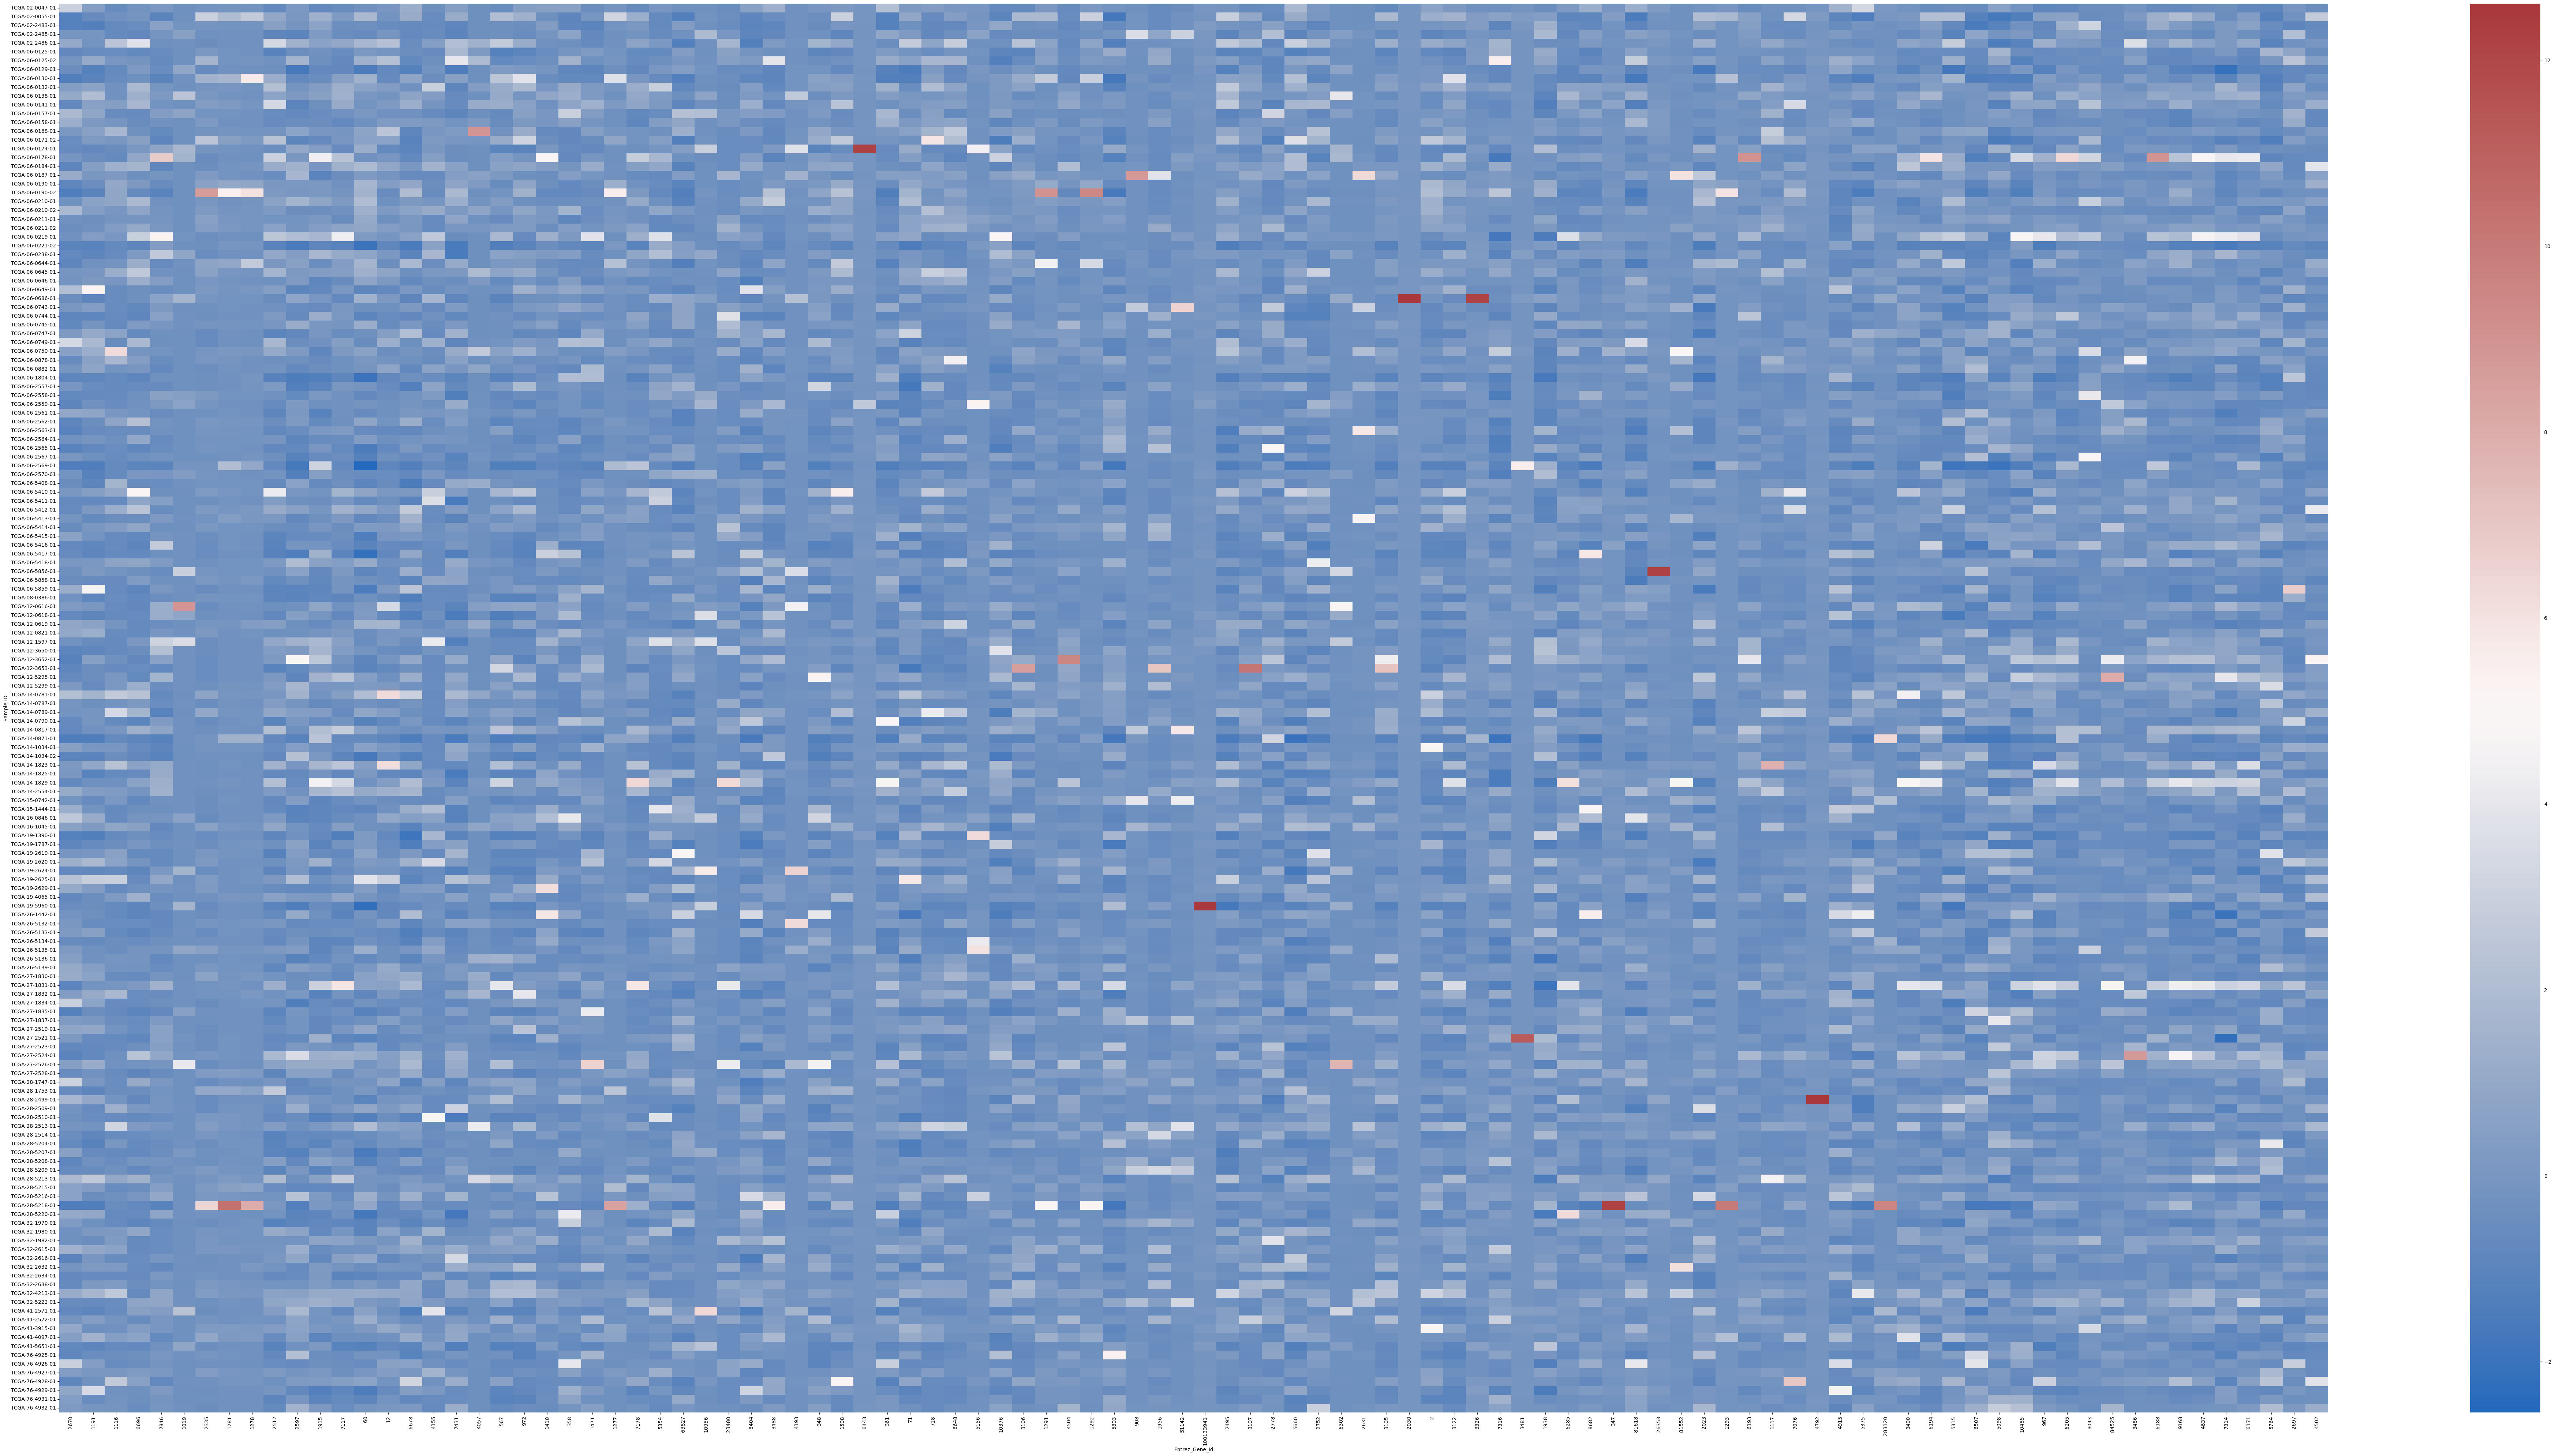

In [12]:
plt.figure(figsize=(nTopGenes, 50))
cmap = 'vlag'
sns.heatmap(subDf_scaled, cmap=cmap)

plt.show()

c:\Users\conno\anaconda3\envs\erdos_ds_environment\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\conno\anaconda3\envs\erdos_ds_environment\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


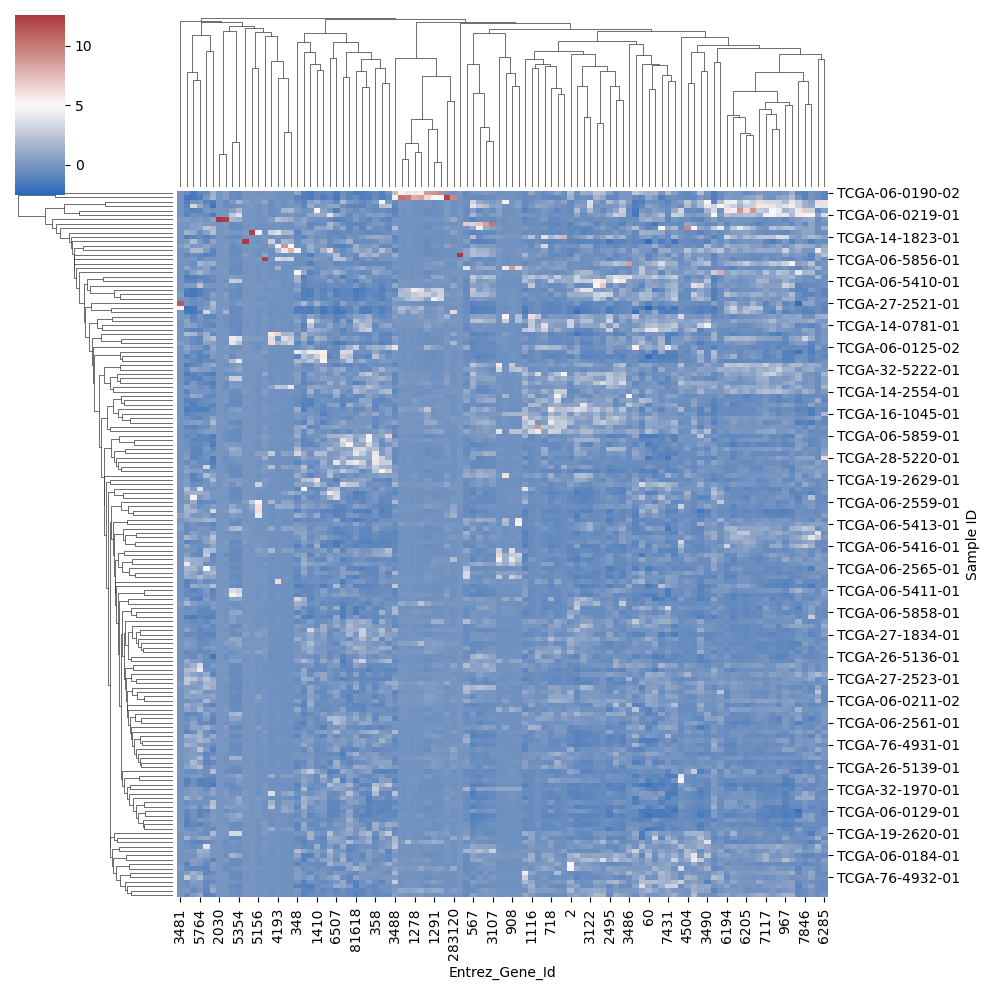

In [13]:

cmap = 'vlag'
sns.clustermap(subDf_scaled, cmap=cmap)

plt.show()

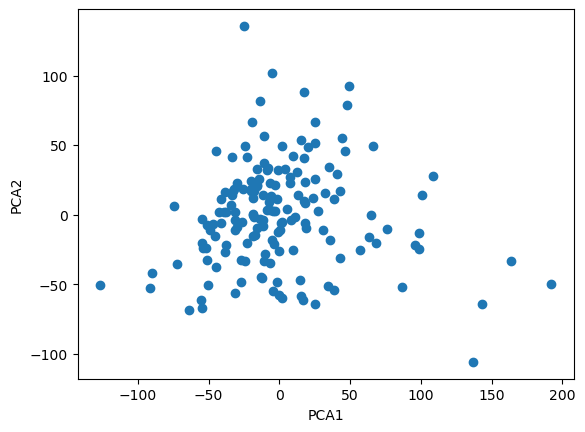

In [14]:
from sklearn.decomposition import PCA

PCA2D = PCA(n_components=2)
X = PCA2D.fit_transform(df_scaled)
X = pd.DataFrame(X, index=df.index, columns = ['PCA1', 'PCA2'])

plt.scatter(X.iloc[:, 0], X.iloc[:, 1])   
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

In [15]:
PCA2D.explained_variance_ratio_

array([0.10588363, 0.07093458])

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [17]:
PCA = PCA(n_components=0.6)
X = pd.DataFrame(PCA.fit_transform(df_scaled), index=df_scaled.index)

PCA.n_components_

np.int64(25)

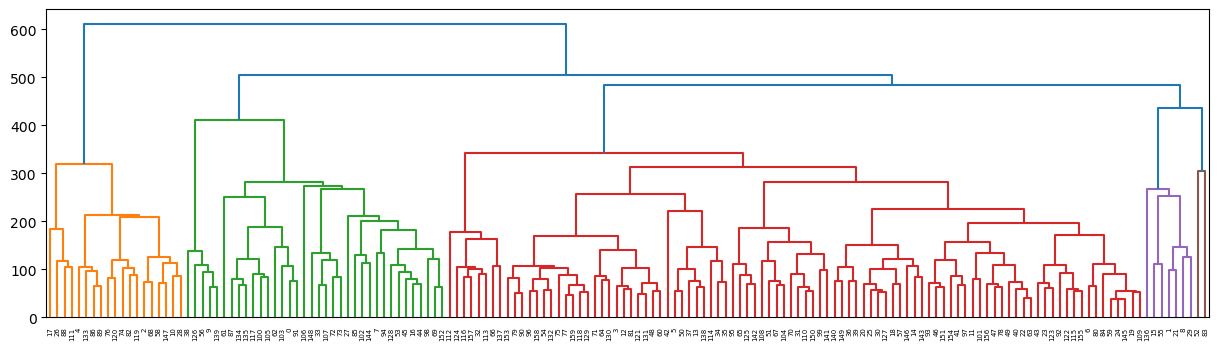

In [18]:
sampleHierarchy = linkage(X, method='ward')

plt.figure(figsize=(15, 4))
dendrogram(sampleHierarchy)
plt.show()

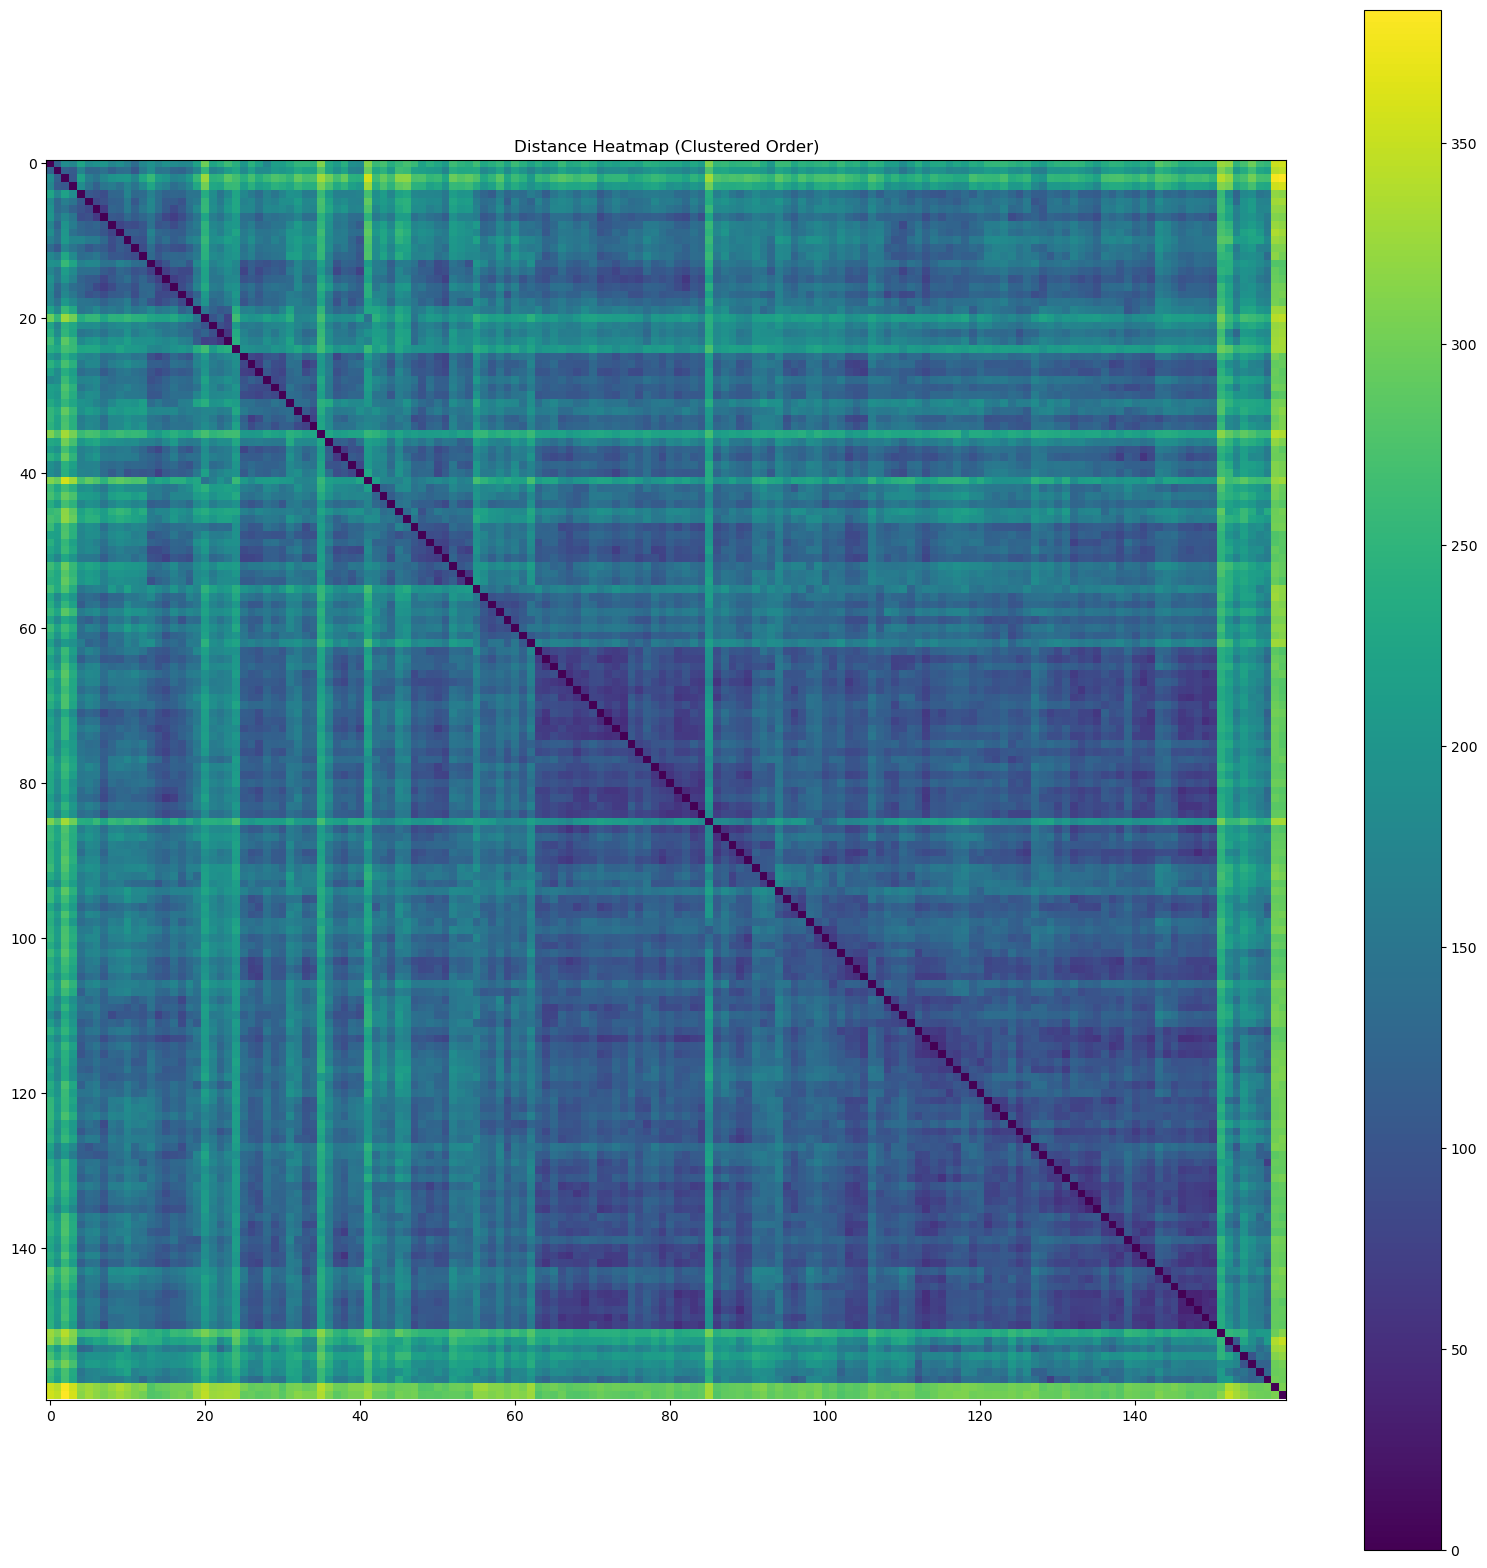

In [19]:
from scipy.spatial.distance import pdist, squareform

from scipy.cluster.hierarchy import leaves_list

D = squareform(pdist(X, metric='euclidean'))  # or another metric
sampleOrder = leaves_list(sampleHierarchy)
D_reordered = D[np.ix_(sampleOrder, sampleOrder)]

plt.figure(figsize=(20,20))

plt.imshow(D_reordered, cmap='viridis')
plt.title('Distance Heatmap (Clustered Order)')
plt.colorbar()

plt.show()

In [20]:
geneDF = df_scaled.transpose()
print(geneDF.shape)
geneDF.head()

(19996, 160)


Sample ID,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-06-0125-01,TCGA-06-0125-02,TCGA-06-0129-01,TCGA-06-0130-01,TCGA-06-0132-01,...,TCGA-41-3915-01,TCGA-41-4097-01,TCGA-41-5651-01,TCGA-76-4925-01,TCGA-76-4926-01,TCGA-76-4927-01,TCGA-76-4928-01,TCGA-76-4929-01,TCGA-76-4931-01,TCGA-76-4932-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100130426,-0.208410,-0.208410,-0.208410,-0.208410,-0.208410,2.657861,-0.208410,-0.208410,-0.208410,-0.208410,...,-0.208410,-0.208410,-0.208410,-0.208410,-0.208410,-0.208410,-0.208410,-0.208410,-0.208410,-0.208410
100133144,-0.666997,-1.229608,-0.690155,1.698637,-0.211555,0.587291,-0.611600,2.856648,-1.112535,-0.859715,...,0.276676,1.564923,-1.006446,1.006778,0.522667,-0.788482,0.632381,0.322040,-0.101895,-1.229608
100134869,-0.540932,1.048777,0.736126,0.917099,-0.888931,0.332054,-1.141312,1.249194,-1.215245,-1.137487,...,0.073928,0.728814,0.099491,1.344493,0.741302,-0.600598,-0.590725,-1.165612,-0.328080,0.026394
10357,-0.218413,-1.448888,0.079346,1.741143,0.195087,-0.353264,-0.909485,0.917896,-1.254881,-1.042684,...,-1.228302,-1.647693,0.593500,2.602203,0.618406,-0.835179,-0.864831,0.178786,-0.001174,0.071686
10431,1.075106,1.072662,2.632242,-0.785014,-0.443923,-1.133817,-1.011783,-0.014808,0.573748,0.286817,...,-0.595053,-0.234352,-0.616593,-0.508298,-0.257608,-0.110865,-0.500215,0.103670,-0.837053,-0.653199


In [21]:
topGeneDF = geneDF.loc[mostVariantGenes,:]
topGeneDF.shape

(100, 160)

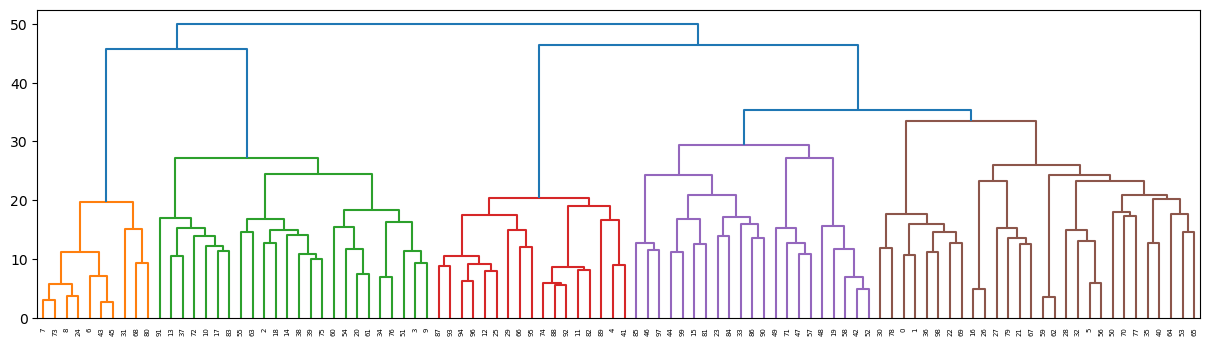

In [22]:
geneHierarchy = linkage(topGeneDF, method='ward')

plt.figure(figsize=(15, 4))
dendrogram(geneHierarchy)
plt.show()

In [23]:
geneOrder = leaves_list(geneHierarchy)
smallDF = topGeneDF.transpose()
print(smallDF.shape)


(160, 100)


In [24]:
geneOrder[:5]

array([ 7, 73,  8, 24,  6], dtype=int32)

In [25]:
max(geneOrder)

np.int32(99)

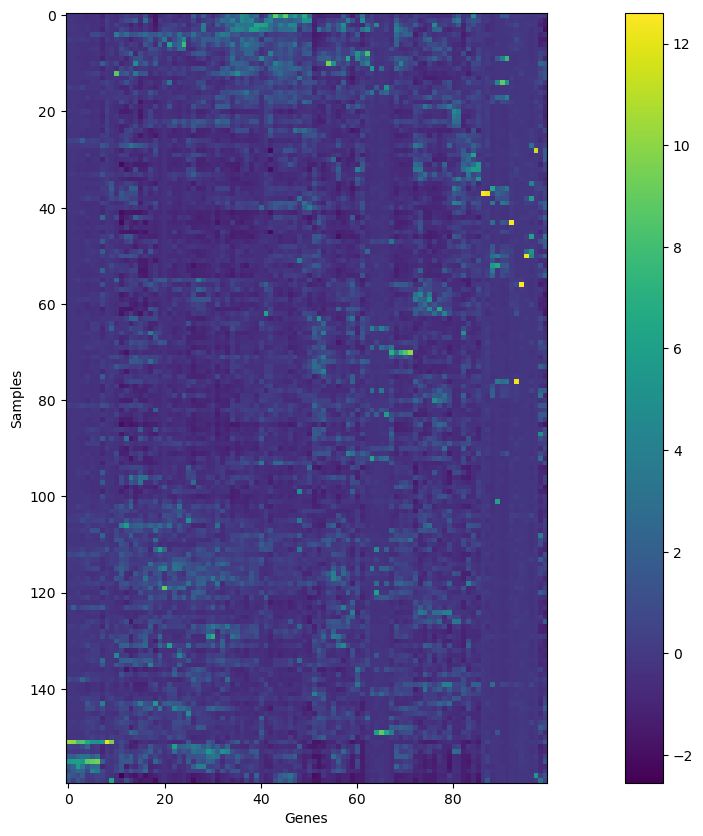

In [26]:
smallDF_reordered = smallDF.iloc[sampleOrder, geneOrder]

plt.figure(figsize=(20,10))

plt.imshow(smallDF_reordered, cmap='viridis')
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.colorbar()

plt.show()
plt.show()

c:\Users\conno\anaconda3\envs\erdos_ds_environment\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\conno\anaconda3\envs\erdos_ds_environment\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


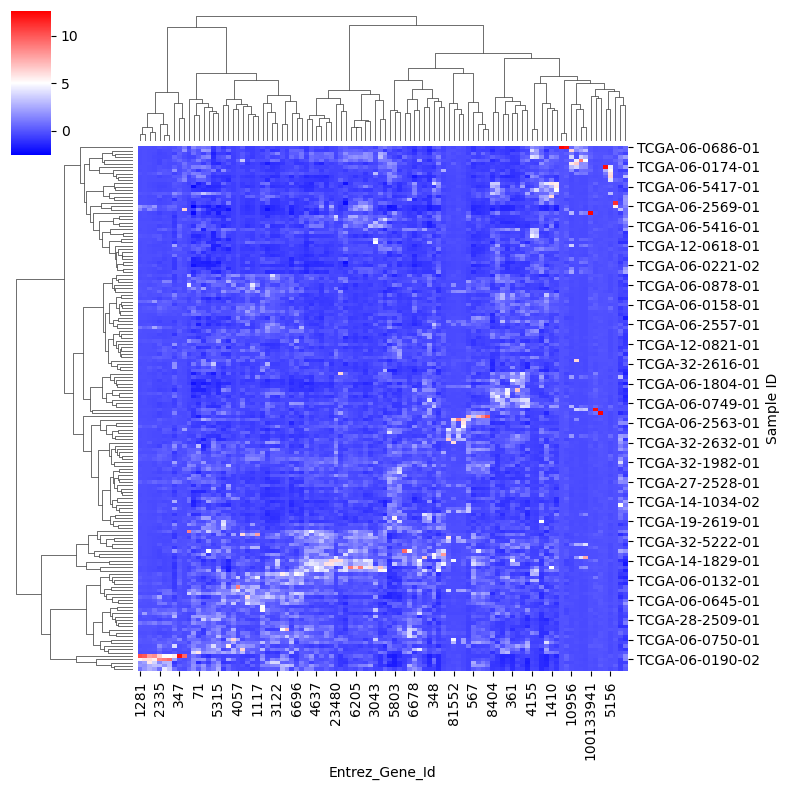

In [27]:
sns.clustermap(
    smallDF,
    metric='euclidean', method='ward',
    cmap='bwr',
    figsize=(8, 8)
)